Python Programming Final Project

Collaborators : Nidhi Shyamsundar Berde, Samyak Meshram
CRN : 74177

Topic : Analysis of NYC Crimes data and its classification using Random Forest and KNN clasifier (2010-2021)

In [99]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [100]:
#Read the csv file
data = pd.read_csv('NYPD_Complaint_Data_Historic-2.csv',low_memory=False)

In [101]:
#Delete the ccolumns that are not necessary for the analysis
del data['X_COORD_CD']
del data['Y_COORD_CD']
del data['Lat_Lon']
del data['PD_CD']
del data['TRANSIT_DISTRICT']
del data['STATION_NAME']
del data['HADEVELOPT']
del data['PARKS_NM']
del data['HOUSING_PSA']
del data['JURIS_DESC']
del data['JURISDICTION_CODE']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697565 entries, 0 to 5697564
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_DESC            object 
 10  CRM_ATPT_CPTD_CD   object 
 11  LAW_CAT_CD         object 
 12  BORO_NM            object 
 13  LOC_OF_OCCUR_DESC  object 
 14  PREM_TYP_DESC      object 
 15  SUSP_AGE_GROUP     object 
 16  SUSP_RACE          object 
 17  SUSP_SEX           object 
 18  Latitude           float64
 19  Longitude          float64
 20  PATROL_BORO        object 
 21  VIC_AGE_GROUP      object 
 22  VIC_RACE           object 
 23  VIC_SEX            object 
dtypes: float64(3), int64(2), object(19)
memory usage: 

In [102]:
#check for duplicate values
print('Duplicated Values: {}'.format(data.duplicated().sum()))


Duplicated Values: 0


In [103]:
#check for null values in the data
data.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT               0
CMPLNT_FR_TM               4
CMPLNT_TO_DT         1059204
CMPLNT_TO_TM         1056896
ADDR_PCT_CD              195
RPT_DT                     0
KY_CD                      0
OFNS_DESC               9611
PD_DESC                 4555
CRM_ATPT_CPTD_CD         165
LAW_CAT_CD                 0
BORO_NM                 7355
LOC_OF_OCCUR_DESC    1142736
PREM_TYP_DESC          23109
SUSP_AGE_GROUP       3042271
SUSP_RACE            2233573
SUSP_SEX             2233573
Latitude                 151
Longitude                151
PATROL_BORO             4629
VIC_AGE_GROUP         928028
VIC_RACE                 282
VIC_SEX                  201
dtype: int64

In [104]:
# Checking for date columns and time. If it has irrelevant dates, remove the entry or convert it to datetime format
data['CMPLNT_FR_DT'] = pd.to_datetime(data.CMPLNT_FR_DT, errors = 'coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data.CMPLNT_TO_DT, errors = 'coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors = 'coerce')
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], format = '%H:%M:%S', errors = 'coerce')
data['RPT_DT'] = pd.to_datetime(data.RPT_DT, errors = 'coerce')

In [105]:
# Validate the crime indicator column
crime_indicator_list = ["COMPLETED", "ATTEMPTED", "FAILED", "INTERRUPTED PREMATURELY"]
data = data[data['CRM_ATPT_CPTD_CD'].isin(crime_indicator_list)]

In [106]:
#validate the offence list column
offence_list = ["FELONY", "MISDEMEANOR", "VIOLATION"]
data = data[data['LAW_CAT_CD'].isin(offence_list)]

In [107]:
#validating the borough name column
borough_list = ["BRONX","BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]
data = data[data['BORO_NM'].isin(borough_list)]   

In [108]:
#replacing ambiguous or incorrect data
data = data.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE',
                                    'U': 'UNKNOWN'
                                        }).copy()

In [109]:
#Replacing all Nan values with relevant data
data.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)
data.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)
data.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)
data.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)
data.fillna({'PREM_TYP_DESC':'UNKNOWN'}, inplace=True)
data.fillna({'SUSP_AGE_GROUP':'UNKNOWN'}, inplace=True)
data.fillna({'SUSP_RACE':'UNKNOWN'}, inplace=True)
data.fillna({'SUSP_SEX':'UNKNOWN'}, inplace=True)
data.fillna({'CMPLNT_TO_DT': 0 }, inplace=True)
data.fillna({'CMPLNT_TO_TM': 0 }, inplace=True)
data.fillna({'OFNS_DESC':'UNKNOWN'}, inplace=True)

In [110]:
#check for null values
data.isnull().sum()

CMPLNT_NUM             0
CMPLNT_FR_DT           0
CMPLNT_FR_TM           4
CMPLNT_TO_DT           0
CMPLNT_TO_TM           0
ADDR_PCT_CD            1
RPT_DT                 0
KY_CD                  0
OFNS_DESC              0
PD_DESC                0
CRM_ATPT_CPTD_CD       0
LAW_CAT_CD             0
BORO_NM                0
LOC_OF_OCCUR_DESC      0
PREM_TYP_DESC          0
SUSP_AGE_GROUP         0
SUSP_RACE              0
SUSP_SEX               0
Latitude             148
Longitude            148
PATROL_BORO           74
VIC_AGE_GROUP          0
VIC_RACE               0
VIC_SEX                0
dtype: int64

In [111]:
#Dropping the rows with null values
data = data.dropna()

In [112]:
data.isna().sum()

CMPLNT_NUM           0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
CMPLNT_TO_DT         0
CMPLNT_TO_TM         0
ADDR_PCT_CD          0
RPT_DT               0
KY_CD                0
OFNS_DESC            0
PD_DESC              0
CRM_ATPT_CPTD_CD     0
LAW_CAT_CD           0
BORO_NM              0
LOC_OF_OCCUR_DESC    0
PREM_TYP_DESC        0
SUSP_AGE_GROUP       0
SUSP_RACE            0
SUSP_SEX             0
Latitude             0
Longitude            0
PATROL_BORO          0
VIC_AGE_GROUP        0
VIC_RACE             0
VIC_SEX              0
dtype: int64

In [113]:
data.LAW_CAT_CD.unique()

array(['MISDEMEANOR', 'VIOLATION', 'FELONY'], dtype=object)

Diplaying the percentage of Crimes that were recorded for the respective Law Categories
The most number of crimes fall under 'Misdemeanor'

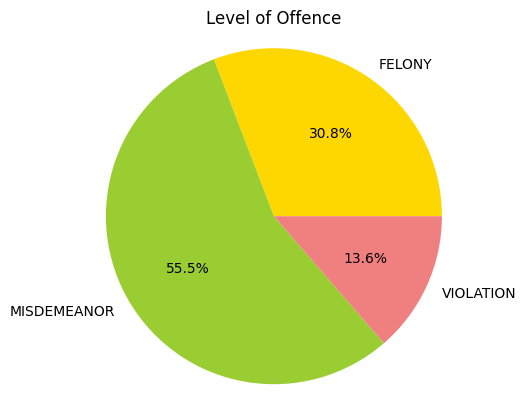

In [114]:

offence_level_count = data.groupby(['LAW_CAT_CD']).size().reset_index(name='COUNTS')
offence_level_count

colors = ['gold', 'yellowgreen', 'lightcoral']


plt.pie(offence_level_count['COUNTS'], labels=list(offence_level_count['LAW_CAT_CD']), colors=colors,
        autopct='%1.1f%%')
plt.title("Level of Offence")
plt.axis('equal')
plt.show()

Counting the crimes by grouping the months till date.
It can be observed that the most number of crimes took place during May - October

Text(0.5, 0, 'MONTHS')

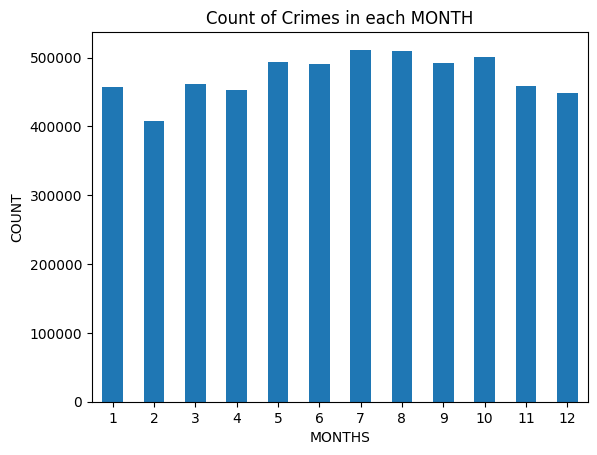

In [115]:


test1 = data[['PD_DESC']].groupby([data['CMPLNT_FR_DT'].dt.month.rename('month')]).count().reset_index()
test1['PD_DESC'] = test1['PD_DESC'].astype(int)
ax = test1.plot.bar(x='month', y='PD_DESC', rot=0, title = "Count of Crimes in each MONTH", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("MONTHS")

In [ ]:
Display the number of crimes in each year in descending order.
It can be seen that there is a significant decrease over the years however the sudden spike in 2021 during the pandemic.


Text(0.5, 0, 'YEAR')

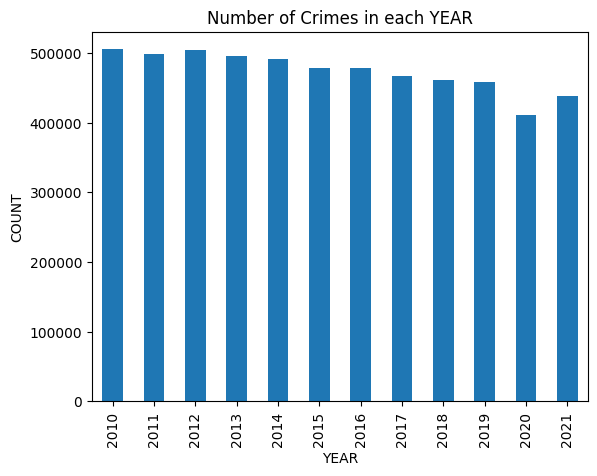

In [116]:
test1 = data[['PD_DESC']].groupby([data['CMPLNT_FR_DT'].dt.year.rename('year')]).count().reset_index()
test1 = test1.sort_values(by=['year'])
ax = test1.head(20).plot.bar(x='year', y='PD_DESC', rot=90, title = "Number of Crimes in each YEAR", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")

Display the number of crimes in each borough
It can be seen that Brooklyn recorded the most number of crimes and Staten Island can be considered a safe location.

Text(0.5, 0, 'BOROUGH')

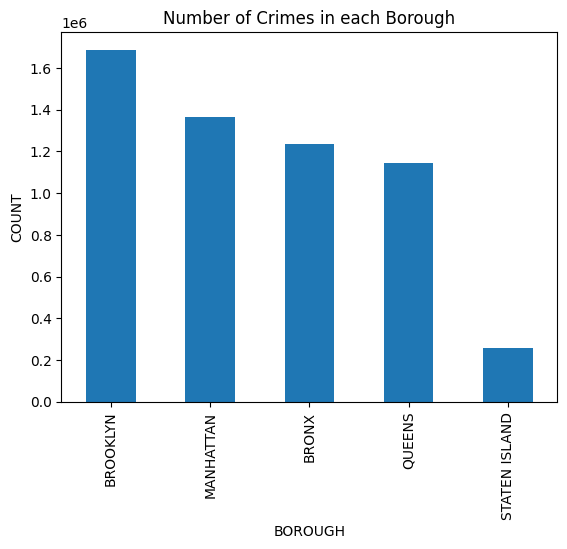

In [117]:
test2 = data[['PD_DESC']].groupby([data['BORO_NM']]).count().reset_index()
test2 = test2.sort_values(by=['PD_DESC'], ascending = False)
axi = test2.head(10).plot.bar(x='BORO_NM', y= 'PD_DESC', rot=90, title = "Number of Crimes in each Borough", legend = False)
axi.set_ylabel("COUNT")
axi.set_xlabel("BOROUGH")

Highest location of crimes 
It can be observed that most crimes took place in the inside. For Eg : Inside the park, inside the stores, etc

<AxesSubplot: title={'center': 'Crime over the years'}, xlabel='index'>

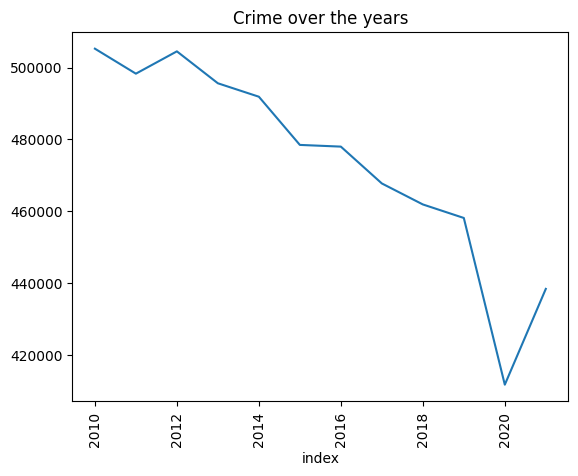

In [119]:
#Line plot of crimes over the years

yearly = data['CMPLNT_FR_DT'].dt.year
yearly = yearly.value_counts().reset_index().sort_values(by=['index'],ascending = True)
yearly.plot.line(x='index', y='CMPLNT_FR_DT', rot=90, title = "Crime over the years", legend = False,)


Location wise total number of crimes

Text(0.5, 0, 'LOCATION')

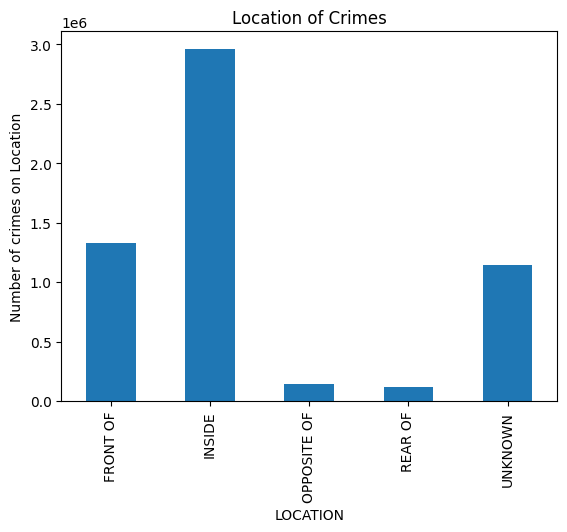

In [118]:

location = data.groupby(['LOC_OF_OCCUR_DESC']).size().reset_index(name='COUNTS')
ax = location.plot.bar(x='LOC_OF_OCCUR_DESC', y='COUNTS', rot=90, title = "Location of Crimes", legend = False)
ax.set_ylabel("Number of crimes on Location")
ax.set_xlabel("LOCATION")

Victim Age group that is affected the most
Most victims fall in the 25-44 Age group

Text(0.5, 0, 'VICTIM AGE GROUP')

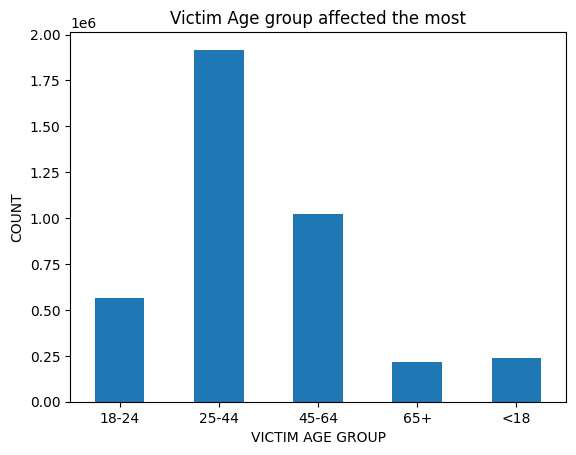

In [120]:

def validate_victimAge(data):
    ageList = ['<18','18-24','25-44','45-64','65+']
    data = data[data['VIC_AGE_GROUP'].isin(ageList)]
    return data
Victimdata = validate_victimAge(data)

VictimAge = Victimdata.groupby(['VIC_AGE_GROUP']).size().reset_index(name='COUNTS')
ax = VictimAge.head(10).plot.bar(x='VIC_AGE_GROUP', y='COUNTS', rot=0, title = "Victim Age group affected the most", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("VICTIM AGE GROUP")

Most suspects also lie in the same 25-44 age group


Text(0.5, 0, 'SUSPECT AGE GROUP')

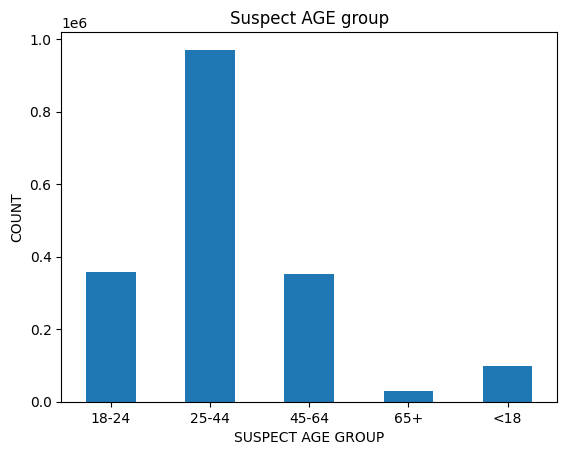

In [121]:
def validate_suspectAge(data):
    ageList = ['<18','18-24','25-44','45-64','65+']
    data = data[data['SUSP_AGE_GROUP'].isin(ageList)]
    return data
suspectage = validate_suspectAge(data)

suspectAge = suspectage.groupby(['SUSP_AGE_GROUP']).size().reset_index(name='COUNTS')
ax = suspectAge.head(10).plot.bar(x='SUSP_AGE_GROUP', y='COUNTS', rot=0, title = "Suspect AGE group", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("SUSPECT AGE GROUP")

<AxesSubplot: xlabel='SUSP_RACE', ylabel='VIC_RACE'>

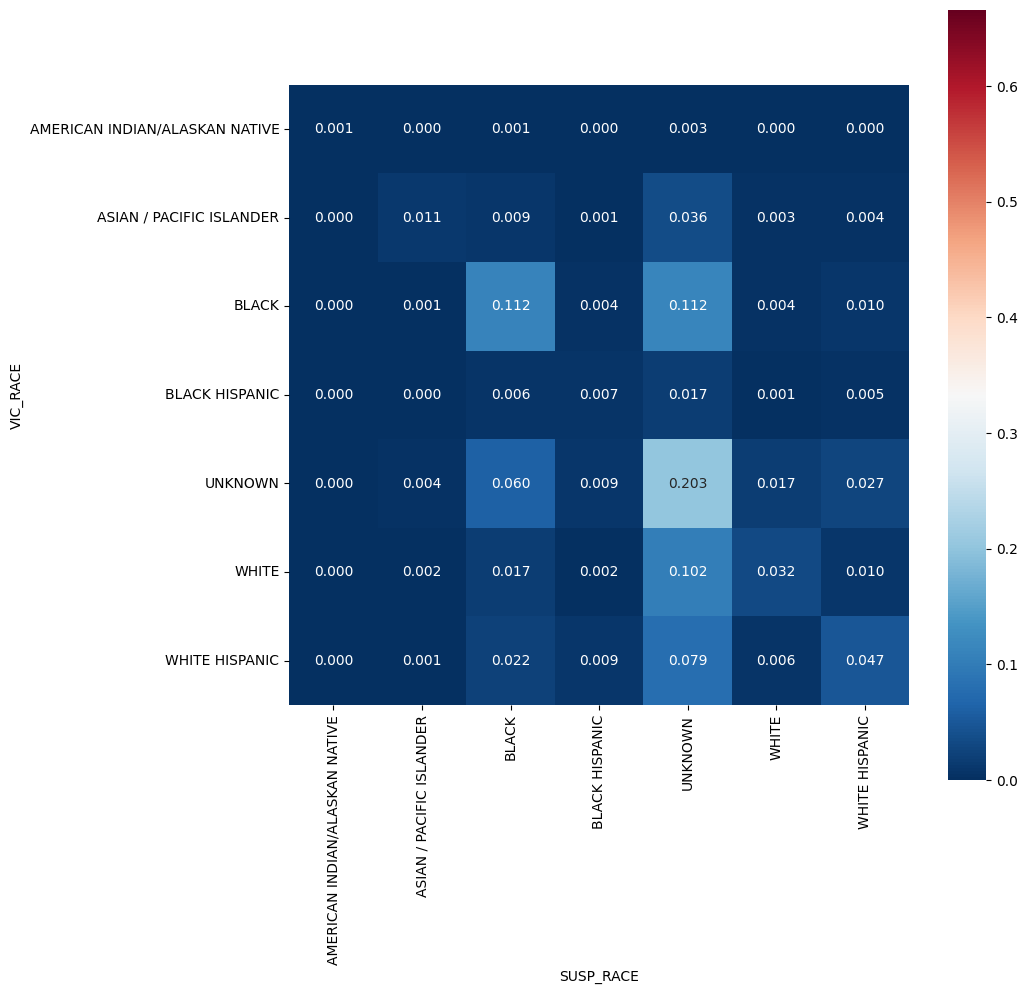

In [122]:
cross_table = data.groupby(['SUSP_RACE', 'VIC_RACE'])['KY_CD'].count()
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(cross_table, cmap='RdBu_r', ax=ax,square=True,vmin=0, vmax=0.666,annot=True,fmt='.3f',)

/var/folders/cy/cxz48t697xzf0bp6v8yvv0tr0000gn/T/ipykernel_64520/4093088827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f=sb.heatmap(data.corr())


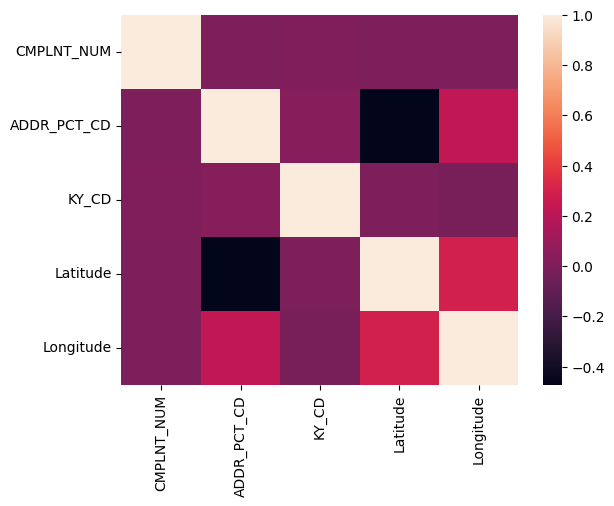

In [123]:
#Diplay the corelation between the values
f=sb.heatmap(data.corr())

Plotting the top 20 times according to the offense description.


Text(0.5, 0, 'CRIMES')

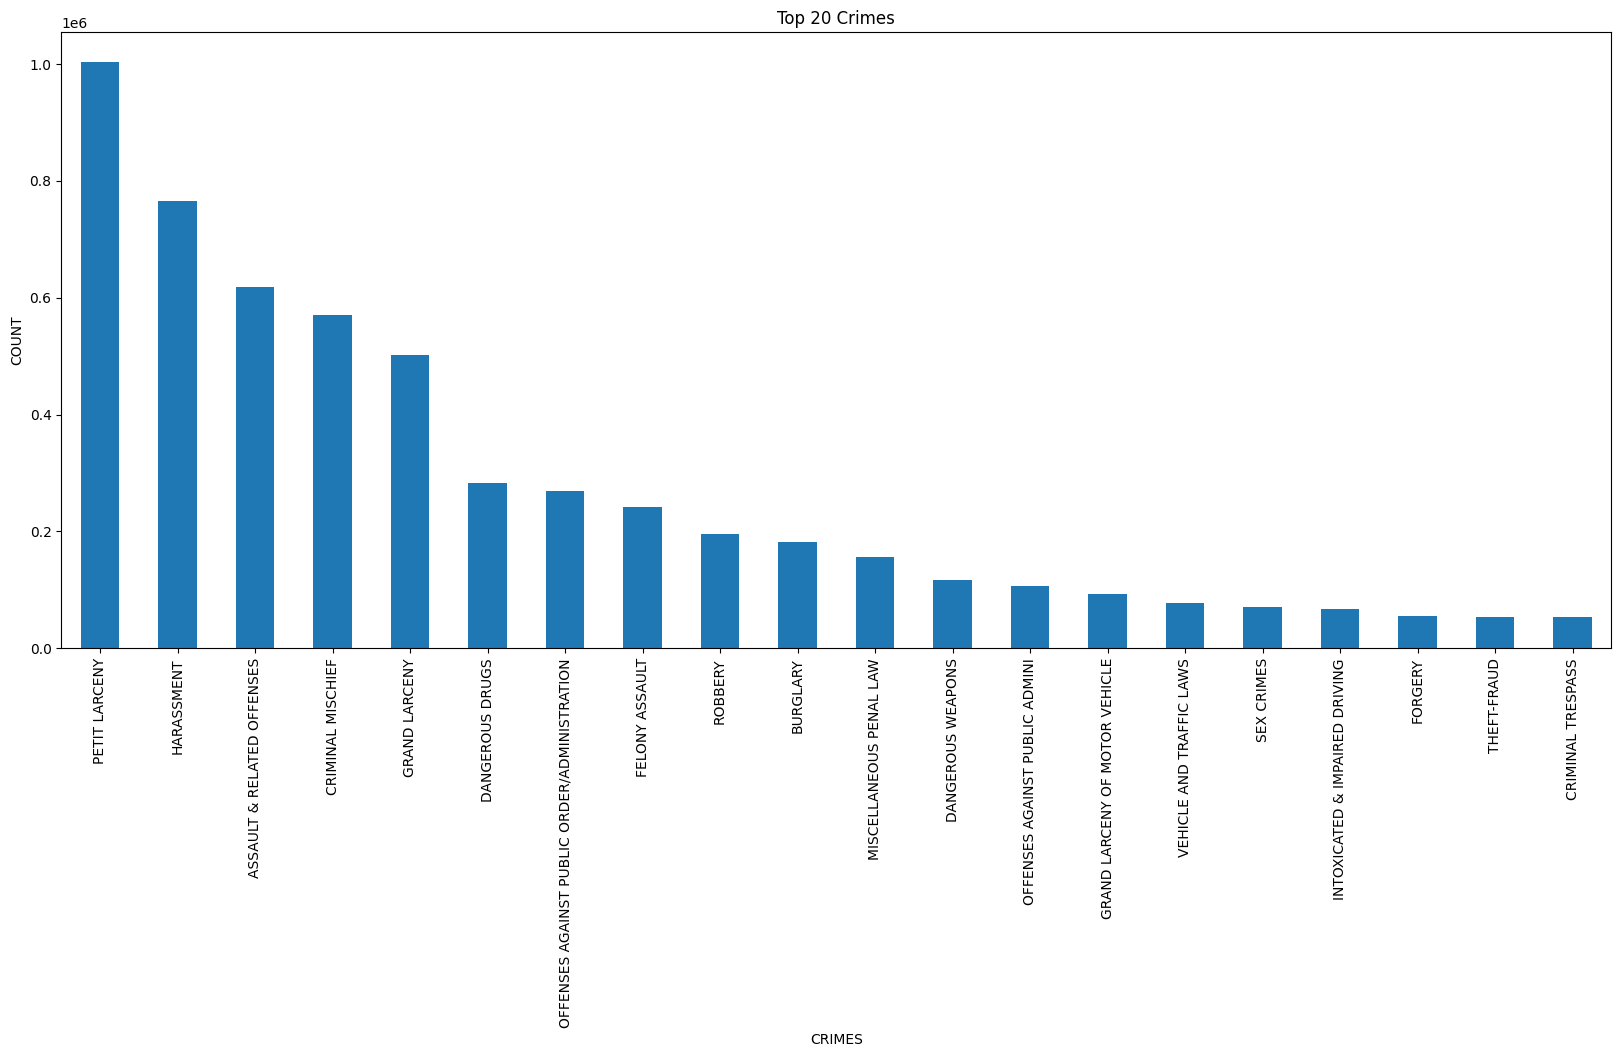

In [124]:
x = data.groupby(['OFNS_DESC']).size().reset_index(name='COUNTS')
x = x.sort_values(by=['COUNTS'], ascending=False)
ax = x.head(20).plot.bar(x='OFNS_DESC', y='COUNTS', figsize=(20,8), rot=90, title = "Top 20 Crimes", legend = False, )
ax.set_ylabel("COUNT")
ax.set_xlabel("CRIMES")

In [61]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,...,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,267589619,2010-01-02,1900-01-01 11:30:00,2010-01-04 00:00:00,1900-01-01 11:30:00,66.0,2010-01-29,351,CRIMINAL MISCHIEF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",...,DRUG STORE,UNKNOWN,UNKNOWN,UNKNOWN,40.642526,-74.002254,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION
1,707065886,2010-01-02,1900-01-01 23:35:00,0,0,122.0,2010-01-03,347,INTOXICATED & IMPAIRED DRIVING,"INTOXICATED DRIVING,ALCOHOL",...,OTHER,UNKNOWN,UNKNOWN,UNKNOWN,40.598943,-74.063761,PATROL BORO STATEN ISLAND,UNKNOWN,UNKNOWN,UNKNOWN
2,603921991,2010-01-02,1900-01-01 00:15:00,2010-01-02 00:00:00,1900-01-01 00:16:00,71.0,2010-01-02,578,HARASSMENT,"HARASSMENT,SUBD 1,CIVILIAN",...,STREET,25-44,BLACK,FEMALE,40.663133,-73.962432,PATROL BORO BKLYN SOUTH,45-64,BLACK,MALE
3,803640494,2010-01-02,1900-01-01 17:25:00,2010-01-02 00:00:00,1900-01-01 17:30:00,7.0,2010-01-02,234,PROSTITUTION & RELATED OFFENSES,"PROSTITUTION 4,PROMOTING&SECUR",...,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,UNKNOWN,40.712715,-73.989231,PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION
4,419349561,2010-01-02,1900-01-01 20:08:00,2010-01-02 00:00:00,1900-01-01 21:30:00,9.0,2010-01-02,578,HARASSMENT,"HARASSMENT,SUBD 1,CIVILIAN",...,RESIDENCE - APT. HOUSE,UNKNOWN,BLACK,MALE,40.725197,-73.979585,PATROL BORO MAN SOUTH,18-24,BLACK,FEMALE


Below we will use the above cleaned dataset for further classifying the data based on Offense and Borough Name

First, splitting the date and time column

In [125]:
data['Year'] = data['CMPLNT_FR_DT'].dt.year
data['Month'] = data['CMPLNT_FR_DT'].dt.month
data['Day'] = data['CMPLNT_FR_DT'].dt.day
data['Hour'] = data['CMPLNT_FR_TM'].dt.hour
data['Minute'] = data['CMPLNT_FR_TM'].dt.minute

data = data.drop(['CMPLNT_FR_DT'], axis=1) 
data = data.drop(['CMPLNT_FR_TM'], axis=1)
data = data.drop(['CMPLNT_TO_DT'],axis=1)
data = data.drop(['CMPLNT_TO_TM'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689877 entries, 0 to 5697564
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CMPLNT_NUM         int64         
 1   ADDR_PCT_CD        float64       
 2   RPT_DT             datetime64[ns]
 3   KY_CD              int64         
 4   OFNS_DESC          object        
 5   PD_DESC            object        
 6   CRM_ATPT_CPTD_CD   object        
 7   LAW_CAT_CD         object        
 8   BORO_NM            object        
 9   LOC_OF_OCCUR_DESC  object        
 10  PREM_TYP_DESC      object        
 11  SUSP_AGE_GROUP     object        
 12  SUSP_RACE          object        
 13  SUSP_SEX           object        
 14  Latitude           float64       
 15  Longitude          float64       
 16  PATROL_BORO        object        
 17  VIC_AGE_GROUP      object        
 18  VIC_RACE           object        
 19  VIC_SEX            object        
 20  Year               int64

Setting the complaint number as index

In [126]:
data.set_index('CMPLNT_NUM', inplace = True)
data.head()

,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,...,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Year,Month,Day,Hour,Minute
CMPLNT_NUM,,,,,,,,,,,,,,,,,,,,,
267589619,66.0,2010-01-29,351,CRIMINAL MISCHIEF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,DRUG STORE,...,-74.002254,PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION,2010,1,2,11,30
707065886,122.0,2010-01-03,347,INTOXICATED & IMPAIRED DRIVING,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,STATEN ISLAND,UNKNOWN,OTHER,...,-74.063761,PATROL BORO STATEN ISLAND,UNKNOWN,UNKNOWN,UNKNOWN,2010,1,2,23,35
603921991,71.0,2010-01-02,578,HARASSMENT,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,UNKNOWN,STREET,...,-73.962432,PATROL BORO BKLYN SOUTH,45-64,BLACK,MALE,2010,1,2,0,15
803640494,7.0,2010-01-02,234,PROSTITUTION & RELATED OFFENSES,"PROSTITUTION 4,PROMOTING&SECUR",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,...,-73.989231,PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,BUSINESS/ORGANIZATION,2010,1,2,17,25
419349561,9.0,2010-01-02,578,HARASSMENT,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,...,-73.979585,PATROL BORO MAN SOUTH,18-24,BLACK,FEMALE,2010,1,2,20,8


In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['OFNS_DESC'] = le.fit_transform(data.OFNS_DESC.values)
data['OFNS_DESC']

CMPLNT_NUM
267589619    11
707065886    31
603921991    28
803640494    57
419349561    28
             ..
762473413     7
963777933    59
672473146    54
731196693    26
286937182     7
Name: OFNS_DESC, Length: 5689877, dtype: int64

In [ ]:
Encode the columns using Label encoder

In [128]:
data['LAW_CAT_CD'] = le.fit_transform(data.LAW_CAT_CD.values)
data['PD_DESC'] = le.fit_transform(data.PD_DESC.values)
data['CRM_ATPT_CPTD_CD'] = le.fit_transform(data.CRM_ATPT_CPTD_CD.values)
data['BORO_NM'] = le.fit_transform(data.BORO_NM.values)
data['LOC_OF_OCCUR_DESC'] = le.fit_transform(data.LOC_OF_OCCUR_DESC.values)
data['PREM_TYP_DESC'] = le.fit_transform(data.PREM_TYP_DESC.values)
data['SUSP_RACE'] = le.fit_transform(data.SUSP_RACE.values)
data['PATROL_BORO'] = le.fit_transform(data.PATROL_BORO.values)
data['VIC_AGE_GROUP'] = le.fit_transform(data.VIC_AGE_GROUP.values)
data['VIC_RACE'] = le.fit_transform(data.VIC_RACE.values)
data['VIC_SEX'] = le.fit_transform(data.VIC_SEX.values)
data['SUSP_AGE_GROUP'] = le.fit_transform(data.SUSP_AGE_GROUP.values)
data['SUSP_SEX'] = le.fit_transform(data.SUSP_SEX.values)
data.head()

,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,...,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Year,Month,Day,Hour,Minute
CMPLNT_NUM,,,,,,,,,,,,,,,,,,,,,
267589619,66.0,2010-01-29,351,11,84,1,1,1,0,23,...,-74.002254,1,117,4,0,2010,1,2,11,30
707065886,122.0,2010-01-03,347,31,156,1,1,4,4,44,...,-74.063761,7,117,4,3,2010,1,2,23,35
603921991,71.0,2010-01-02,578,28,136,1,2,1,4,62,...,-73.962432,1,85,2,2,2010,1,2,0,15
803640494,7.0,2010-01-02,234,57,301,1,1,2,1,53,...,-73.989231,4,117,4,0,2010,1,2,17,25
419349561,9.0,2010-01-02,578,28,136,1,2,2,1,53,...,-73.979585,4,83,2,1,2010,1,2,20,8


In [129]:
data = data.drop(['RPT_DT'],axis=1)


In [130]:
classes = data['BORO_NM'].unique()
classes

array([1, 4, 2, 3, 0])

Checking for corealtion among the features

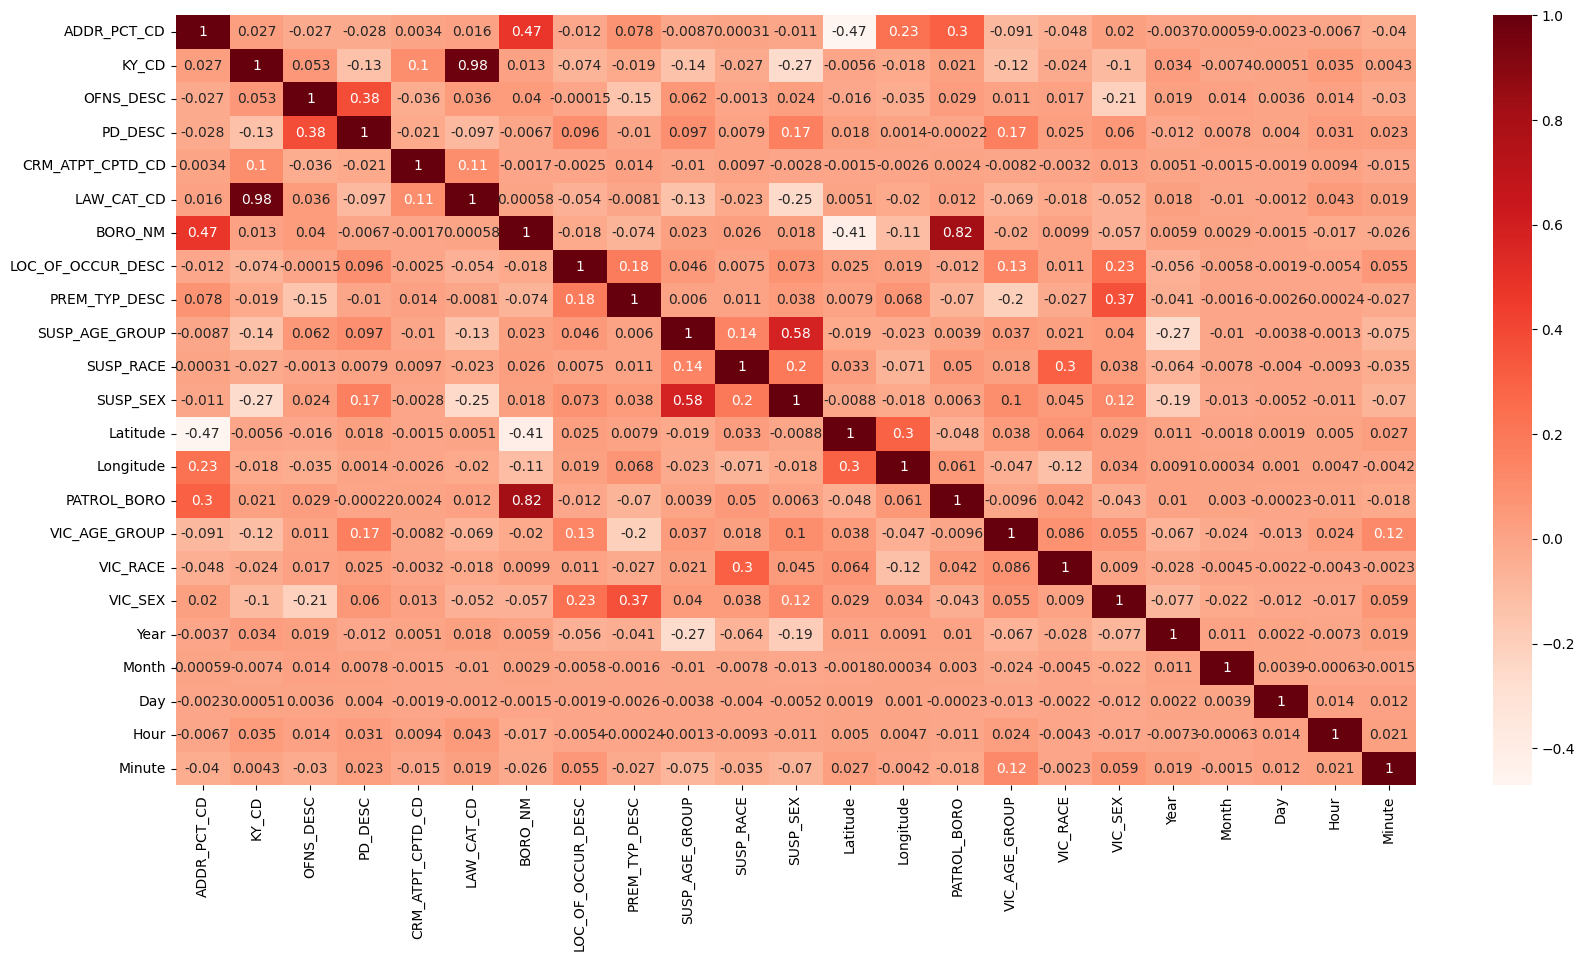

In [131]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation coefficient has values between -1 to 1

A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
A value closer to 1 implies stronger positive correlation
A value closer to -1 implies stronger negative correlation

Check for corelation considering target variable as Offense Description

In [184]:
#Correlation with output variable
cor_target = abs(cor['OFNS_DESC'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

KY_CD               0.053133
OFNS_DESC           1.000000
PD_DESC             0.381891
CRM_ATPT_CPTD_CD    0.036059
LAW_CAT_CD          0.036484
BORO_NM             0.039692
PREM_TYP_DESC       0.154525
SUSP_AGE_GROUP      0.061973
Longitude           0.035333
VIC_SEX             0.207719
Minute              0.030365
Name: OFNS_DESC, dtype: float64

In [185]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = [ "BORO_NM", "PREM_TYP_DESC", "Longitude",
             "VIC_SEX","SUSP_AGE_GROUP","LAW_CAT_CD","Minute"]
print('Full Features: ', Features)

Full Features:  ['BORO_NM', 'PREM_TYP_DESC', 'Longitude', 'VIC_SEX', 'SUSP_AGE_GROUP', 'LAW_CAT_CD', 'Minute']


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



Split dataset to Training Set & Test Set

In [187]:

x, y = train_test_split(data, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 3)
Target = "OFNS_DESC"

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)


Feature Set Used    :  ['BORO_NM', 'PREM_TYP_DESC', 'Longitude', 'VIC_SEX', 'SUSP_AGE_GROUP', 'LAW_CAT_CD', 'Minute']
Target Class        :  OFNS_DESC
Training Set Size   :  (3982913, 23)
Test Set Size       :  (1706964, 23)


Using Decision Tree - Random Forest

In [188]:

# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [189]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average="weighted")

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.565400324787166
Recall      :  0.565400324787166
Precision   :  0.5523588337003603
F1 Score    :  0.5226728096414275


In [ ]:
Using K nearest Neighbor algorithm

In [ ]:

# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=8)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [193]:
#Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average ="weighted")

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== K-Nearest Neighbors Results ==========
Accuracy    :  0.5322068889560647
Recall      :  0.5322068889560647
Precision   :  0.5129947481085736
F1 Score    :  0.5126787318632148


Plot the features that contributed to the model

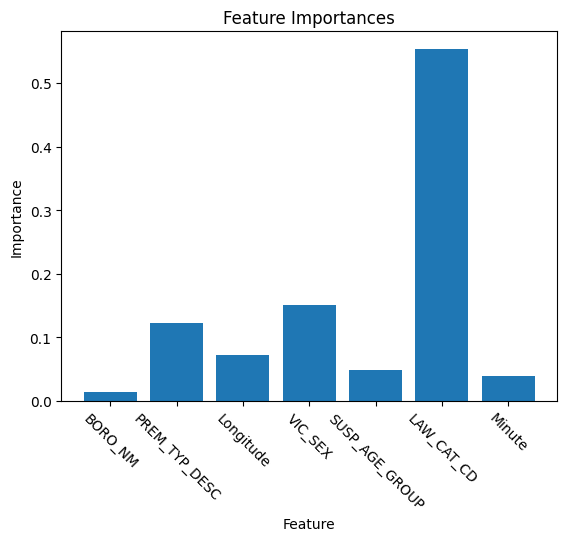

In [194]:

plt.bar(Features, rf_model.feature_importances_)
plt.xlabel('Feature', )
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=-45)
plt.show()

Another set of evaluation done considering Borough Name as Target variable

In [195]:
#Correlation with output variable
cor_target = abs(cor['BORO_NM'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.025]
relevant_features

ADDR_PCT_CD      0.472319
OFNS_DESC        0.039692
BORO_NM          1.000000
PREM_TYP_DESC    0.073866
SUSP_RACE        0.025663
Latitude         0.412004
Longitude        0.111735
PATROL_BORO      0.819334
VIC_SEX          0.057324
Minute           0.025975
Name: BORO_NM, dtype: float64

In [211]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = [ "OFNS_DESC", "PREM_TYP_DESC",
             "VIC_SEX","SUSP_RACE","LAW_CAT_CD","Minute","Hour"]
print('Full Features: ', Features)

Full Features:  ['OFNS_DESC', 'PREM_TYP_DESC', 'VIC_SEX', 'SUSP_RACE', 'LAW_CAT_CD', 'Minute', 'Hour']


In [212]:
#Split dataset to Training Set & Test Set
a, b = train_test_split(data, 
                        test_size = 0.3, 
                        train_size = 0.7, 
                        random_state= 3)
Target = "BORO_NM"

a1 = x[Features]    #Features to train
a2 = x[Target]      #Target Class to train
b1 = y[Features]    #Features to test
b2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)


Feature Set Used    :  ['OFNS_DESC', 'PREM_TYP_DESC', 'VIC_SEX', 'SUSP_RACE', 'LAW_CAT_CD', 'Minute', 'Hour']
Target Class        :  BORO_NM
Training Set Size   :  (3982913, 23)
Test Set Size       :  (1706964, 23)


In [213]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=8)

# Model Training
knn_model.fit(X=a1,
             y=a2)

# Prediction
result = knn_model.predict(y[Features]) 

In [214]:
#Model Evaluation
ac_sc = accuracy_score(b2, result)
rc_sc = recall_score(b2, result,average="weighted")
pr_sc = precision_score(b2, result,average="weighted")
f1_sc = f1_score(b2, result,average="weighted")

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== K-Nearest Neighbors Results ==========
Accuracy    :  0.34184669389629774
Recall      :  0.34184669389629774
Precision   :  0.3417602778486241
F1 Score    :  0.33529492060146365


In [215]:
#Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=a1,
             y=a2)

# Prediction
result = rf_model.predict(y[Features])

In [216]:
# Model Evaluation
ac_sc = accuracy_score(b2, result)
rc_sc = recall_score(b2, result, average="weighted")
pr_sc = precision_score(b2, result, average="weighted")
f1_sc = f1_score(b2, result, average="weighted")

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Random Forest Results ==========
Accuracy    :  0.39887308695438217
Recall      :  0.39887308695438217
Precision   :  0.41086523527274416
F1 Score    :  0.38367797309404617


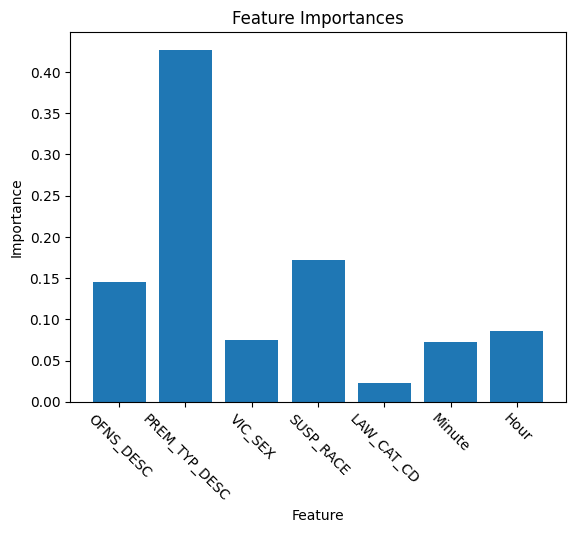

In [217]:
# Plot the feature importances
plt.bar(Features, rf_model.feature_importances_)
plt.xlabel('Feature', )
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=-45)
plt.show()